In [20]:
# Mat work for step 1
from pathlib import Path
import tarfile
import urllib.request

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
# csv_file = "creditcard_2023.csv"
#read the csv file and create a DataFrame
df = pd.read_csv(csv_file)

In [22]:
#Check the shape of the dataframe to see the number of rows and columns.
df.shape

(568630, 31)

In [23]:
#Info about the DataFrame columns names, data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [24]:
#Descriptive stats for numerical columns, such as count, mean, standart deviation, minimum and maximum values.
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [25]:
#Checking for null values
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

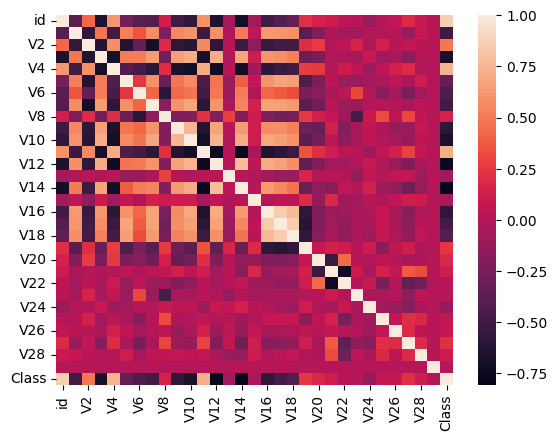

In [26]:
#Compute the correlation matrix between numerical columns and visualize
# using a heatmap
sns.heatmap(df.corr())

In [27]:
#Visuatlize the target variable
df['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [28]:
# Work for step 2, I used the ref code housing_transformer_pipeline as idea of how to do step 2.


def create_pipeline(features, categorical_features):
    # Create a trasnformer pipeline
    features_transformer = Pipeline(steps=[('imputer', SimpleImputer(
        strategy='median')), ('scaler', StandardScaler())])

    # Craete a cat transformer pipeline
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(
        strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(transformers=[(
        'num', features_transformer, features), ('cat', categorical_transformer, categorical_features)])

    # Create the final pipeline
    # add more steps later as we work on the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    return pipeline

In [29]:
#Main code --------------------------------
X = df.drop(['id', 'Class'], axis=1)
y = df['Class']

features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
            'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
            'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
            'Amount']
categorical_features = []
pipeline = create_pipeline(features, categorical_features)
pipeline.fit(X,y)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['V1', 'V2', 'V3', 'V4', 'V5',
                                                   'V6', 'V7', 'V8', 'V9',
                                                   'V10', 'V11', 'V12', 'V13',
                                                   'V14', 'V15', 'V16', 'V17',
                                                   'V18', 'V19', 'V20', 'V21',
                                                   'V22', 'V23', 'V24', 'V25',
                                                   'V26', 'V27', 'V28',
                                                   'Amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])]))])

In [31]:
# step 3 using help from assignment 4
# Split into train, dev, and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
X_train, X_dev, y_train, y_dev = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Function to evaluate an algorithm


def evaluate_algo(algo, X_train, y_train, X_dev, y_dev):
    # Create the pipeline
    numeric_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                        'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
                        'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
                        'Amount']
    pipeline = create_pipeline(features, categorical_features)

    # Combine the pipeline and the algorithm
    pipeline_with_algo = Pipeline(steps=[
        ('preprocessor', pipeline),
        ('algo', algo)
    ])

    pipeline_with_algo.fit(X_train, y_train)
    y_pred = pipeline_with_algo.predict(X_dev)
    accuracy = accuracy_score(y_dev, y_pred)
    precision = precision_score(y_dev, y_pred)
    recall = recall_score(y_dev, y_pred)
    f1 = f1_score(y_dev, y_pred)
    return [accuracy, precision, recall, f1]

# Function for LogisticRegression


def evaluate_lr(X_train, y_train, X_dev, y_dev):
    print("Evaluating LogisticRegression...")
    return evaluate_algo(LogisticRegression(max_iter=1000, random_state=42), X_train, y_train, X_dev, y_dev)

# Function for SVC


def evaluate_svc(X_train, y_train, X_dev, y_dev):
    print("Evaluating SVC...")
    return evaluate_algo(SVC(random_state=42), X_train, y_train, X_dev, y_dev)

# Function for KNeighborsClassifier


def evaluate_knn(X_train, y_train, X_dev, y_dev):
    print("Evaluating KNeighborsClassifier...")
    return evaluate_algo(KNeighborsClassifier(), X_train, y_train, X_dev, y_dev)

# Function for DecisionTreeClassifier


def evaluate_dt(X_train, y_train, X_dev, y_dev):
    print("Evaluating DecisionTreeClassifier...")
    return evaluate_algo(DecisionTreeClassifier(random_state=42), X_train, y_train, X_dev, y_dev)

# Function for RandomForestClassifier


def evaluate_rf(X_train, y_train, X_dev, y_dev):
    print("Evaluating RandomForestClassifier...")
    return evaluate_algo(RandomForestClassifier(random_state=42), X_train, y_train, X_dev, y_dev)


# Evaluate algorithms
lr_scores = evaluate_lr(X_train, y_train, X_dev, y_dev)
svc_scores = evaluate_svc(X_train, y_train, X_dev, y_dev)
knn_scores = evaluate_knn(X_train, y_train, X_dev, y_dev)
dt_scores = evaluate_dt(X_train, y_train, X_dev, y_dev)
rf_scores = evaluate_rf(X_train, y_train, X_dev, y_dev)

# Create DataFrame to store scores
scores_df = pd.DataFrame([lr_scores, svc_scores, knn_scores, dt_scores, rf_scores],
                         columns=['Accuracy', 'Precision', 'Recall', 'F1'],
                         index=['LogisticRegression', 'SVC', 'KNeighborsClassifier',
                                'DecisionTreeClassifier', 'RandomForestClassifier'])

print(scores_df)

Evaluating LogisticRegression...
Evaluating SVC...
Evaluating KNeighborsClassifier...
Evaluating DecisionTreeClassifier...
Evaluating RandomForestClassifier...
                        Accuracy  Precision    Recall        F1
LogisticRegression      0.964641   0.977666  0.950715  0.964002
SVC                     0.996560   0.995944  0.997153  0.996548
KNeighborsClassifier    0.997670   0.995364  0.999978  0.997666
DecisionTreeClassifier  0.997340   0.996278  0.998389  0.997332
RandomForestClassifier  0.999912   0.999823  1.000000  0.999912
